In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import importlib
import Projet6_utils as utils
importlib.reload(utils)


import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords

import PIL
import skimage
import cv2 as cv

### Downloads & installs

In [2]:
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('words')
#nltk.download('punkt')

#!pip install gensim
#!pip install tensorflow

#!pip uninstall tensorflow_hub
#!pip install tensorflow_text
#!pip install transformers
#!pip install sacremoses
#!pip install Pillow
#!pip install scikit-image
#!pip install opencv-python

# TEXT DATA

In [3]:
PATH = "E:/OpenClassrooms/Projet6/Data/flipkart"

df = pd.read_csv(os.path.join(PATH, "flipkart_com-ecommerce_sample_1050.csv"))

In [4]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [10]:
df['product_category_tree'].nunique()

642

In [8]:
#Get main product category

importlib.reload(utils)
df['main_cat'] = df['product_category_tree'].apply(lambda x: utils.get_main_cat(x))

#Attributes numeric label to the catgories
from sklearn.preprocessing import LabelEncoder
df['true_label'] = LabelEncoder().fit_transform(df['main_cat'])

In [9]:
display(df['main_cat'][0])

'Home Furnishing '

In [6]:
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
main_cat                     0
true_label                   0
dtype: int64

In [8]:
df['main_cat'].value_counts(normalize=False)

Home Furnishing                150
Home Decor & Festive Needs     150
Watches                        150
Baby Care                      150
Computers                      150
Kitchen & Dining               150
Beauty and Personal Care       150
Name: main_cat, dtype: int64

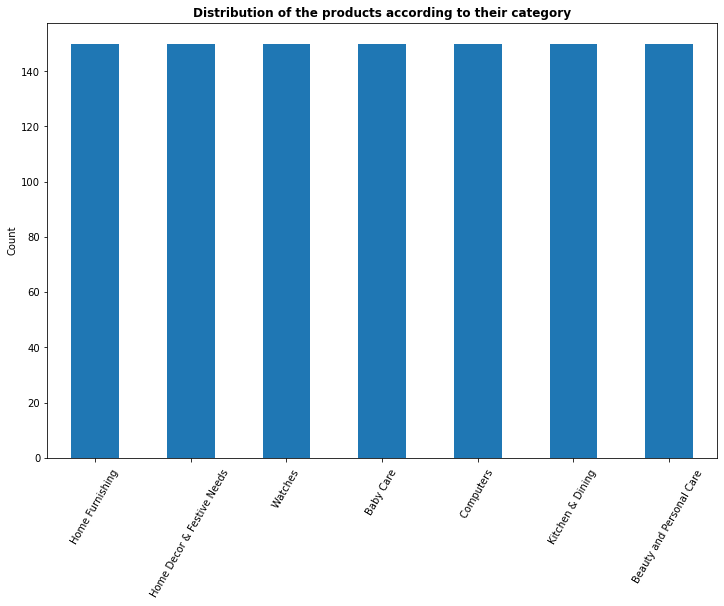

In [9]:
df['main_cat'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8), rot=60)
plt.title('Distribution of the products according to their category', fontsize=12, fontweight='semibold')
plt.ylabel('Count')

plt.show()

### Test on 1 sample document
#### We test here the tokenization and transformations on a single product

In [10]:
doc_sample = df.description.sample(1, random_state=1).values[0].lower()
doc_sample

'key features of suave naturals everlasting sunshine conditioner ideal for: boys, girls applied for: conditioning hair condition: damaged hair hair type: dry hair,specifications of suave naturals everlasting sunshine conditioner (665 ml) conditioner traits hair condition damaged hair hair type dry hair applied for conditioning ideal for boys, girls general traits brand suave quantity 665 ml model name naturals everlasting sunshine conditioner in the box 1 conditioner'

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(doc_sample)

print("len tokens : ", len(tokens))
print("len unique tokens : ", len(set(tokens)))

len tokens :  67
len unique tokens :  32


In [12]:
importlib.reload(utils)
list_tokens = utils.tokenize_clean_doc(doc_sample, stem_or_lem=None, force_alpha=True, to_string=False)
list_tokens

['key',
 'features',
 'suave',
 'naturals',
 'everlasting',
 'sunshine',
 'conditioner',
 'ideal',
 'boys',
 'girls',
 'applied',
 'conditioning',
 'hair',
 'condition',
 'damaged',
 'hair',
 'hair',
 'type',
 'dry',
 'hair',
 'specifications',
 'suave',
 'naturals',
 'everlasting',
 'sunshine',
 'conditioner',
 'conditioner',
 'traits',
 'hair',
 'condition',
 'damaged',
 'hair',
 'hair',
 'type',
 'dry',
 'hair',
 'applied',
 'conditioning',
 'ideal',
 'boys',
 'girls',
 'general',
 'traits',
 'brand',
 'suave',
 'quantity',
 'model',
 'name',
 'naturals',
 'everlasting',
 'sunshine',
 'conditioner',
 'box',
 'conditioner']

In [13]:
len(list_tokens)

54

### Full corpus
#### We apply the tokenization and transformations on the full corpus

In [7]:
df['name_and_description'] = df['product_name'] + ' ' + df['description']

In [15]:
df.iloc[0]['name_and_description']

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

In [8]:
importlib.reload(utils)

#Tokenize product descriptions for different methods

df['tokens_bow'] = df['name_and_description'].apply(lambda x: utils.tokenize_clean_doc(x, stem_or_lem=None))
df['tokens_bow_lem'] = df['name_and_description'].apply(lambda x: utils.tokenize_clean_doc(x, stem_or_lem='lem'))
df['tokens_bow_stem'] = df['name_and_description'].apply(lambda x: utils.tokenize_clean_doc(x, stem_or_lem='stem'))
df['tokens_DL'] = df['name_and_description'].apply(lambda x: utils.tokenize_dl(x))

In [9]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,main_cat,true_label,name_and_description,tokens_bow,tokens_bow_lem,tokens_bow_stem,tokens_DL
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,eleg polyest multicolor abstract eyelet door c...,elegance polyester multicolor abstract eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel specifications sath...,sathiyas cotton bath towel specification sathi...,sathiya cotton bath towel specif sathiya cotto...,sathiyas cotton bath towel specifications of s...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terri face towel set key featur...,eurospa cotton terry face towel set key featur...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton print king size d...,santosh royal fashion cotton printed king size...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king size doubl bed...,jaipur print cotton floral king sized double b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,Oren Empower Extra Large Self Adhesive Sticker...,

## Bag of words

Running time (s) - clustering cvect :  16.3
ARI (bag of words - count vectorizer):  0.3516216179905886


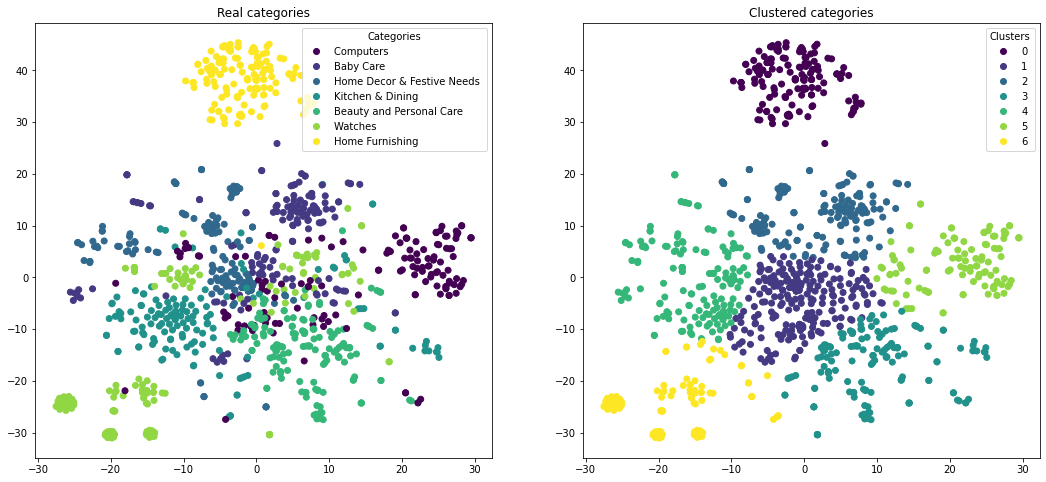

In [18]:
importlib.reload(utils)

list_cat = df['main_cat'].unique().tolist()
n_clust = len(list_cat)
feat = 'tokens_bow_lem'

#CountVectorizer method
ARI_count_vect, X_count_vect, df['cluster_count_vect'], df_count_vect = utils.cluster_bow(feat, n_clust, df, 'cvect')
print('ARI (bag of words - count vectorizer): ', ARI_count_vect)
utils.plot_cat(X_count_vect, df['true_label'], df['cluster_count_vect'], df['main_cat'])

#### The PCA does not reduce the computation time, however the performances are much worse, therfore we do not perform it

Running time (s) - clustering tfidf :  12.0
ARI (bag of words - tfidf):  0.4632212305722075


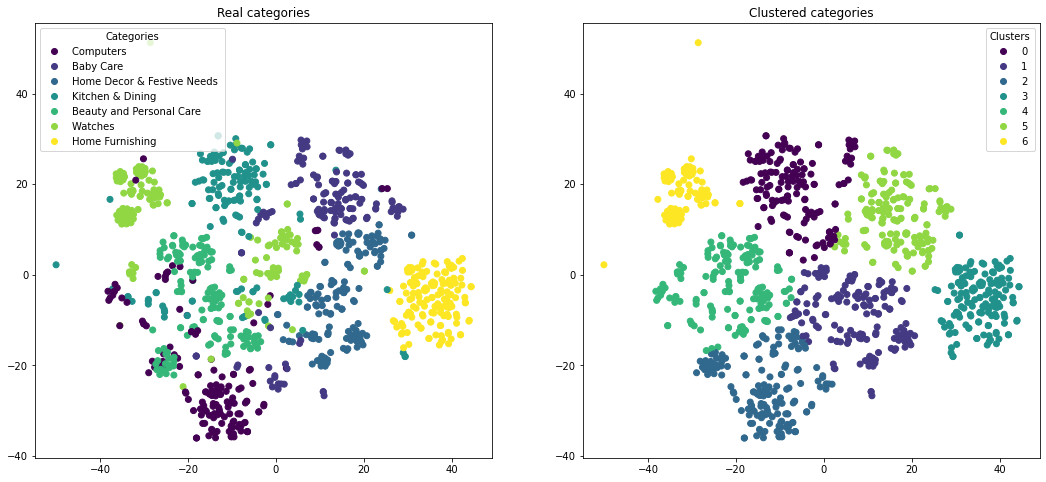

In [19]:
importlib.reload(utils)

#tfidf method

ARI_tfidf, X_tfidf, df['cluster_tfidf'], df_tfidf = utils.cluster_bow(feat, n_clust, df, 'tfidf', do_pca=False)
print('ARI (bag of words - tfidf): ', ARI_tfidf)
utils.plot_cat(X_tfidf, df['true_label'], df['cluster_tfidf'], df['main_cat'])

In [20]:
#Saving the bag of words in csv files

df_tfidf.to_csv(os.path.join(PATH, "df_features_tfidf.csv"), index=True, header=True, index_label='image')
df_count_vect.to_csv(os.path.join(PATH, "df_features_count_vect.csv"), index=True, header=True, index_label='image')

In [21]:
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272
image,,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d4684dcdc759dd9cdf41504698d737d8.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6325b6870c54cd47be6ebfbffa620ec7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fd6cbcc22efb6b761bd564c28928483c.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5912e037d12774bb73a2048f35a00009.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word2Vec

Creating model...
Training model...
Tokenizing...
Embedding...
Executing model...
33/33 [==============================] - 0s 2ms/step
Running time (creating and training w2v model) (s):  36.3
Running time (s) - clustering w2v :  50.5
ARI (Word2Vec):  0.3518197433076809


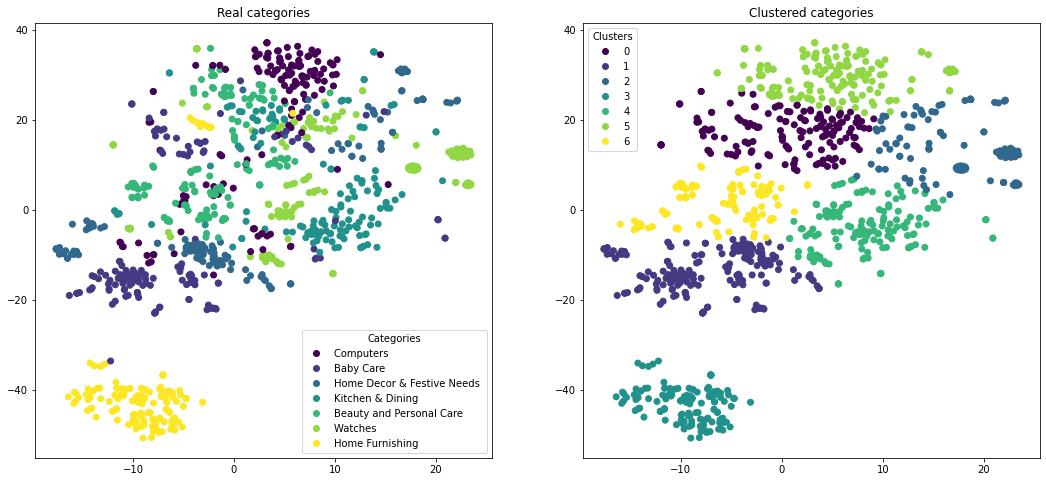

In [22]:
importlib.reload(utils)

feat = 'tokens_bow_lem'
ARI_w2v, X_w2v, df['cluster_w2v'], df_w2v = utils.cluster_bow(feat, n_clust, df, 'w2v')

print('ARI (Word2Vec): ', ARI_w2v)
utils.plot_cat(X_w2v, df['true_label'], df['cluster_w2v'], df['main_cat'])

In [23]:
df_w2v.to_csv(os.path.join(PATH, "df_features_w2v.csv"), index=True, header=True, index_label='image')

## BERT TensorFlow Hub

In [25]:
import tensorflow_hub as hub
import tensorflow_text 

model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

sentences = df['tokens_DL'].to_list()

In [26]:
importlib.reload(utils)

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = utils.feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\Florian/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased

Running time (s) - BERT feature creation:  65.2


Running time (s) - clustering DL:  8.6
ARI (BERT Hub):  0.43314175552276424


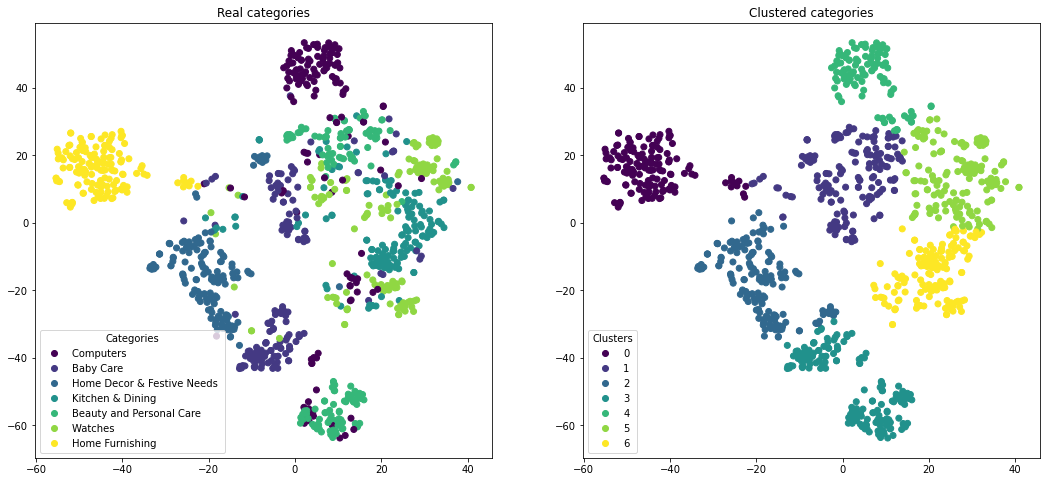

In [27]:
importlib.reload(utils)

feat = features_bert
ARI_bert, X_bert, df['cluster_bert'] = utils.cluster_dl(feat, n_clust, df)

print('ARI (BERT Hub): ', ARI_bert)
utils.plot_cat(X_bert, df['true_label'], df['cluster_bert'], df['main_cat'])

## USE

In [28]:
importlib.reload(utils)

batch_size = 10
sentences = df['tokens_DL'].to_list()

features_use = utils.feature_USE_fct(sentences, batch_size)

Running time (s) - USE feature creation:  6.6


Running time (s) - clustering DL:  7.4
ARI (USE):  0.4446779694769987


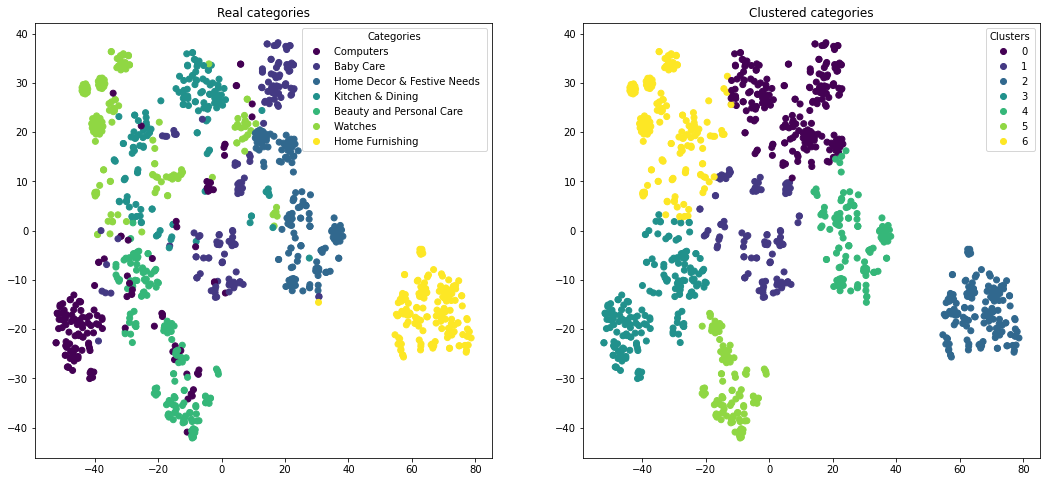

In [29]:
importlib.reload(utils)

feat = features_use
ARI_use, X_use, df['cluster_use'] = utils.cluster_dl(feat, n_clust, df)

print('ARI (USE): ', ARI_use)
utils.plot_cat(X_use, df['true_label'], df['cluster_use'], df['main_cat'])

In [30]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,name_and_description,tokens_bow,tokens_bow_lem,tokens_bow_stem,tokens_DL,cluster_count_vect,cluster_tfidf,cluster_w2v,cluster_bert,cluster_use
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,eleg polyest multicolor abstract eyelet door c...,elegance polyester multicolor abstract eyelet ...,3,2,5,1,3
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel specifications sath...,sathiyas cotton bath towel specification sathi...,sathiya cotton bath towel specif sathiya cotto...,sathiyas cotton bath towel specifications of s...,1,2,5,1,5
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terri face towel set key featur...,eurospa cotton terry face towel set key featur...,1,2,5,1,5
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton print king size d...,santosh royal fashion cotton printed king size...,3,4,5,4,3
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king size doubl bed...,jaipur print cotton floral king sized double b...,3,4,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,Oren Empower Extra Large Self Adhesive Sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empow extra larg self adhes sticker oren ...,oren empower extra large self adhesive sticker...,6,4,2,1,1
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,...,Wallmantra Large Vinyl Sticker Sticker Wallman...,wallmantra large vinyl sticker 

# IMAGES

In [35]:
PATH_image = "E:/OpenClassrooms/Projet6/Data/flipkart/Images/" #Path to images
PATH_modified = "E:/OpenClassrooms/Projet6/Data/flipkart/Images/Modified/" #Path where the modified images are to be saved

## SIFT
### Test on first 2 images
#### 1st image
#### We test here the transformations on the first image, and get the keypoints and descriptors with the SIFT algorithm

In [36]:
image_test = df.iloc[0]['image']
image_test

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

In [37]:
from PIL import Image
img_sample = Image.open(PATH_image + image_test)
img_sample.show()

In [38]:
# Transform first image
from PIL.ImageOps import autocontrast, equalize
from PIL.ImageFilter import MedianFilter

img_sample = autocontrast(img_sample)
img_sample = equalize(img_sample)
img_sample = img_sample.filter(MedianFilter)

img_sample.show()

In [39]:
# SIFT

img_sam = cv.imread(PATH_modified + image_test)

cv.imshow("Display window", img_sam)
cv.waitKey()

gray = cv.cvtColor(img_sam, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create(nfeatures=500)
kp, des = sift.detectAndCompute(gray, None)

cv.imshow("Display window", gray)
cv.waitKey()

-1

In [40]:
#Create df with name of 1st image and list of keypoints in columns

descriptors_df_test = pd.DataFrame({
    'image': [image_test]*len(kp),
    'keypoints': kp
})

In [41]:
# Add descriptors for each keypoint of the first image

descriptors_df_test = pd.concat([descriptors_df_test, pd.DataFrame(des)], axis=1)
descriptors_df_test

,image,keypoints,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4E4E55630>,0.0,0.0,2.0,11.0,9.0,1.0,1.0,2.0,...,16.0,21.0,2.0,2.0,0.0,2.0,81.0,76.0,2.0,1.0
1,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4AC6D3CC0>,9.0,0.0,0.0,6.0,45.0,0.0,0.0,2.0,...,0.0,0.0,147.0,3.0,0.0,2.0,25.0,0.0,0.0,5.0
2,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4999A2BA0>,2.0,0.0,0.0,0.0,26.0,17.0,1.0,4.0,...,0.0,0.0,136.0,20.0,1.0,9.0,10.0,0.0,0.0,5.0
3,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E491B1E8A0>,27.0,1.0,0.0,0.0,0.0,0.0,11.0,27.0,...,3.0,1.0,2.0,2.0,2.0,10.0,5.0,0.0,0.0,0.0
4,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E50784C480>,12.0,1.0,0.0,3.0,60.0,5.0,1.0,2.0,...,0.0,6.0,132.0,1.0,0.0,1.0,2.0,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E507E71DB0>,47.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,3.0,25.0,1.0,0.0,5.0,4.0,0.0,0.0,12.0
497,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E507E71DE0>,12.0,0.0,1.0,7.0,16.0,3.0,2.0,11.0,...,41.0,83.0,0.0,0.0,0.0,0.0,126.0,101.0,2.0,0.0
498,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E507E71E10>,44.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,84.0,10.0,1.0,4.0,5.0,0.0,0.0,0.0
499,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E507E71E40>,119.0,1.0,0.0,1.0,14.0,10.0,6.0,52.0,...,95.0,27.0,7.0,2.0,8.0,15.0,20.0,21.0,50.0,24.0


#### 2nd image
#### Same for the second image. We then regroup the descriptors found for the first 2 images into a single dataframe in the correct format

In [42]:
image_test2 = df.iloc[1]['image']

In [43]:
#Transform image and create keypoints and descriptors with SIFT
importlib.reload(utils)

utils.prepare_image(image_test2)
kp2, des2 = utils.SIFT(image_test2)

In [44]:
#Create df with name of 2nd image and list of keypoints in columns

descriptors_df_test2 = pd.DataFrame({
    'image': [image_test2]*len(kp2),
    'keypoints': kp2
})

## Add descriptors for each keypoint of the second image
descriptors_df_test2 = pd.concat([descriptors_df_test2, pd.DataFrame(des2)], axis=1)

In [45]:
#Create final df containing keypoints of the 2 first images and their descriptors

df_des_test = pd.concat([descriptors_df_test, descriptors_df_test2], axis=0)
df_des_test

,image,keypoints,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4E4E55630>,0.0,0.0,2.0,11.0,9.0,1.0,1.0,2.0,...,16.0,21.0,2.0,2.0,0.0,2.0,81.0,76.0,2.0,1.0
1,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4AC6D3CC0>,9.0,0.0,0.0,6.0,45.0,0.0,0.0,2.0,...,0.0,0.0,147.0,3.0,0.0,2.0,25.0,0.0,0.0,5.0
2,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4999A2BA0>,2.0,0.0,0.0,0.0,26.0,17.0,1.0,4.0,...,0.0,0.0,136.0,20.0,1.0,9.0,10.0,0.0,0.0,5.0
3,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E491B1E8A0>,27.0,1.0,0.0,0.0,0.0,0.0,11.0,27.0,...,3.0,1.0,2.0,2.0,2.0,10.0,5.0,0.0,0.0,0.0
4,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E50784C480>,12.0,1.0,0.0,3.0,60.0,5.0,1.0,2.0,...,0.0,6.0,132.0,1.0,0.0,1.0,2.0,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7b72c92c2f6c40268628ec5f14c6d590.jpg,< cv2.KeyPoint 000001E507E7E570>,2.0,7.0,129.0,34.0,2.0,5.0,13.0,10.0,...,29.0,15.0,27.0,34.0,9.0,16.0,129.0,13.0,0.0,0.0
496,7b72c92c2f6c40268628ec5f14c6d590.jpg,< cv2.KeyPoint 000001E507E7E5A0>,3.0,1.0,11.0,102.0,8.0,2.0,2.0,10.0,...,8.0,94.0,0.0,2.0,7.0,24.0,84.0,34.0,1.0,0.0
497,7b72c92c2f6c40268628ec5f14c6d590.jpg,< cv2.KeyPoint 000001E507E7E5D0>,28.0,3.0,1.0,0.0,2.0,57.0,71.0,117.0,...,9.0,20.0,18.0,5.0,6.0,25.0,129.0,34.0,1.0,5.0
498,7b72c92c2f6c40268628ec5f14c6d590.jpg,< cv2.KeyPoint 000001E507E7E600>,2.0,20.0,62.0,6.0,5.0,24.0,47.0,4.0,...,104.0,118.0,35.0,6.0,1.0,1.0,18.0,80.0,118.0,118.0


### All images
#### We generalize to the entire set of images

In [48]:
importlib.reload(utils)

# initialize df with first image, containing image name and keypoints
init = df.iloc[0]['image']
utils.prepare_image(init)
kp, des = utils.SIFT(init)

descriptors_df = pd.DataFrame({
'image': [init]*len(kp),
'keypoints': kp
})

#Add the descriptors of each keypoint to the df, for the first image
df_des = pd.concat([descriptors_df, pd.DataFrame(des)], axis=1)  

iteration = 2
#Repeat for all other images and concatenate
for i in df['image'][1:]:
    
    utils.prepare_image(i)
    kp, des = utils.SIFT(i)
    
    descriptors_df = pd.DataFrame({
    'image': [i]*len(kp),
    'keypoints': kp
    })
    
    descriptors_df = pd.concat([descriptors_df, pd.DataFrame(des)], axis=1)
    
    df_des = pd.concat([df_des, descriptors_df], axis=0)
    
    if iteration%50 == 0:
        print('images treated: ', iteration, '/1050')
    iteration+=1

images treated:  50 /1050
images treated:  100 /1050
images treated:  150 /1050
images treated:  200 /1050
images treated:  250 /1050
images treated:  300 /1050
images treated:  350 /1050
images treated:  400 /1050
images treated:  450 /1050
images treated:  500 /1050
images treated:  550 /1050
images treated:  600 /1050
images treated:  650 /1050


E:\Anaconda\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


images treated:  700 /1050
images treated:  750 /1050
images treated:  800 /1050
images treated:  850 /1050
images treated:  900 /1050
images treated:  950 /1050
images treated:  1000 /1050
images treated:  1050 /1050


In [49]:
df_des

,image,keypoints,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E491BDBE40>,37.0,0.0,0.0,0.0,15.0,49.0,8.0,4.0,...,135.0,2.0,0.0,0.0,13.0,9.0,17.0,71.0,53.0,0.0
1,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E4AC8C5180>,12.0,12.0,0.0,1.0,11.0,0.0,0.0,0.0,...,30.0,13.0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0
2,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E50C9AD720>,41.0,1.0,0.0,26.0,79.0,2.0,1.0,11.0,...,24.0,8.0,1.0,10.0,101.0,22.0,0.0,3.0,29.0,17.0
3,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E50C9AD7E0>,1.0,2.0,3.0,35.0,67.0,7.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,0.0,0.0
4,55b85ea15a1536d46b7190ad6fff8ce7.jpg,< cv2.KeyPoint 000001E507E7E990>,0.0,13.0,122.0,2.0,0.0,0.0,0.0,0.0,...,26.0,17.0,1.0,4.0,46.0,45.0,17.0,12.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,f2f027ad6a6df617c9f125173da71e44.jpg,< cv2.KeyPoint 000001E567C42600>,48.0,21.0,22.0,27.0,54.0,48.0,5.0,14.0,...,60.0,17.0,0.0,2.0,35.0,39.0,14.0,29.0,22.0,1.0
496,f2f027ad6a6df617c9f125173da71e44.jpg,< cv2.KeyPoint 000001E567C42630>,6.0,31.0,33.0,36.0,18.0,18.0,9.0,5.0,...,24.0,52.0,44.0,14.0,1.0,23.0,49.0,4.0,0.0,6.0
497,f2f027ad6a6df617c9f125173da71e44.jpg,< cv2.KeyPoint 000001E567C42660>,9.0,23.0,39.0,6.0,0.0,0.0,0.0,4.0,...,127.0,49.0,51.0,6.0,2.0,3.0,1.0,3.0,19.0,53.0
498,f2f027ad6a6df617c9f125173da71e44.jpg,< cv2.KeyPoint 000001E567C42690>,0.0,0.0,1.0,1.0,1.0,29.0,29.0,1.0,...,44.0,15.0,7.0,2.0,1.0,3.0,17.0,27.0,97.0,84.0


### Pre-clustering on the VBoW

In [10]:
from sklearn import cluster, metrics
from sklearn.manifold import TSNE

In [52]:
cls = cluster.KMeans(n_clusters=int(np.sqrt(df_des.shape[0])), random_state=1)
cluster_kmeans = cls.fit_predict(df_des.iloc[:, 2:])

df_des['cluster'] = cluster_kmeans

In [53]:
#Visual bag of words
df_sift_vbow = df_des.pivot_table(values=0, index=['image'], columns=['cluster'], aggfunc='count', fill_value=0)
df_sift_vbow

cluster,0,1,2,3,4,5,6,7,8,9,...,695,696,697,698,699,700,701,702,703,704
image,,,,,,,,,,,,,,,,,,,,,
009099b1f6e1e8f893ec29a7023153c4.jpg,0,0,0,0,5,0,1,3,0,0,...,3,0,1,0,0,0,0,0,0,1
0096e89cc25a8b96fb9808716406fe94.jpg,0,0,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
00cbbc837d340fa163d11e169fbdb952.jpg,0,0,0,0,0,0,0,0,1,5,...,0,1,0,0,0,0,3,0,2,0
00d84a518e0550612fcfcba3b02b6255.jpg,3,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,4,5,0,0,0
00e966a5049a262cfc72e6bbf68b80e7.jpg,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feefbdff924dd6b7cc266449c9a36d69.jpg,1,0,1,1,1,0,0,3,0,2,...,0,0,1,1,0,0,0,1,0,1
ff24511994fc459d04145231c8876d6c.jpg,0,0,0,0,0,0,1,0,0,0,...,0,6,0,1,0,1,0,0,1,3
ffbf3794aa8cb6bb8d3f313d0a549a09.jpg,0,0,0,0,0,0,0,1,2,1,...,0,2,0,2,1,0,0,1,0,0


In [54]:
df_sift_vbow.to_csv(os.path.join(PATH, "df_features_sift.csv"), index=True, header=True, index_label='image')

### Clustering

ARI (SIFT):  0.0005306810544289436


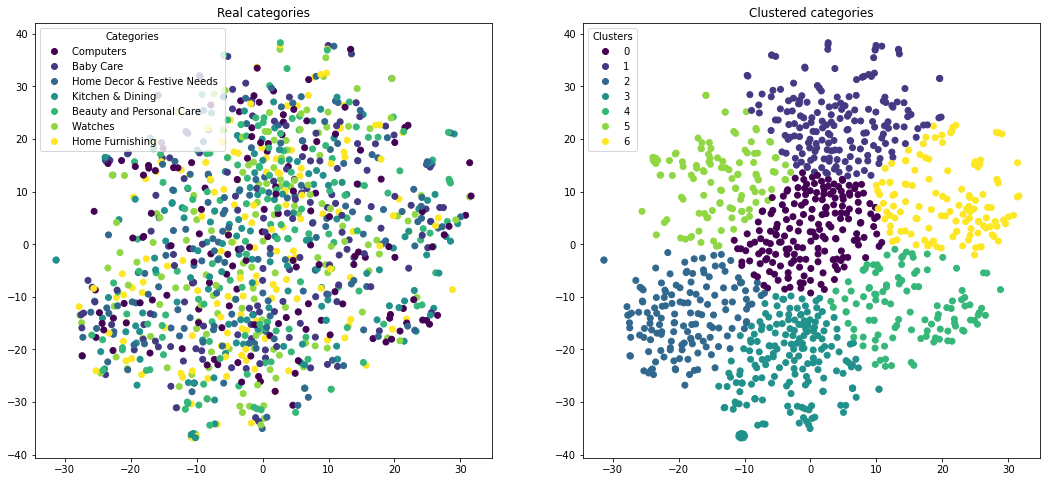

In [56]:
importlib.reload(utils)

list_cat = df['main_cat'].unique().tolist()
n_clust = len(list_cat)

ARI_sift, X_sift, df['cluster_sift'] = utils.cluster_images(n_clust, df, df_sift_vbow)

print('ARI (SIFT): ', ARI_sift)
utils.plot_cat(X_sift, df['true_label'], df['cluster_sift'], df['main_cat'])

## CNN VGG16

In [11]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
importlib.reload(utils)

df_cnn_features = utils.CNN(df['image'][0])
#df_features
iteration=2
for i in df['image'][1:]:
    
    df_cnn_features = df_cnn_features.append(utils.CNN(i))
    if iteration%50 == 0:
        print('images treated: ', iteration, '/1050')
    iteration+=1

1/1 [==============================] - 0s 208ms/step
images treated:  50 /1050
1/1 [==============================] - 0s 219ms/step
images treated:  100 /1050
1/1 [==============================] - 0s 237ms/step
images treated:  150 /1050
1/1 [==============================] - 0s 379ms/step
images treated:  200 /1050
1/1 [==============================] - 0s 207ms/step
images treated:  250 /1050
1/1 [==============================] - 0s 230ms/step
images treated:  300 /1050
1/1 [==============================] - 0s 267ms/step
images treated:  350 /1050
1/1 [==============================] - 0s 215ms/step
images treated:  400 /1050
1/1 [==============================] - 0s 225ms/step
images treated:  450 /1050
1/1 [==============================] - 0s 229ms/step
images treated:  500 /1050
1/1 [==============================] - 0s 230ms/step
images treated:  550 /1050
1/1 [==============================] - 0s 238ms/step
images treated:  600 /1050
1/1 [==============================] - 0s

E:\Anaconda\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 204ms/step
images treated:  700 /1050
1/1 [==============================] - 0s 212ms/step
images treated:  750 /1050
1/1 [==============================] - 0s 220ms/step
images treated:  800 /1050
1/1 [==============================] - 0s 206ms/step
images treated:  850 /1050
1/1 [==============================] - 0s 229ms/step
images treated:  900 /1050
1/1 [==============================] - 0s 223ms/step
images treated:  950 /1050
1/1 [==============================] - 0s 218ms/step
images treated:  1000 /1050
1/1 [==============================] - 0s 211ms/step
images treated:  1050 /1050


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
55b85ea15a1536d46b7190ad6fff8ce7.jpg,3.398614,0.859572,0.000000,1.106560,2.266122,2.927241,2.446448,0.000000,0.000000,0.000000,...,0.485876,0.0,0.000000,0.472938,0.875756,0.783684,0.000000,0.000000,0.851055,0.000000
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.000000,0.000000,0.000000,1.172009,0.000000,0.000000,0.000000,0.000000,0.000000,6.499799,...,1.169696,0.0,0.000000,0.000000,0.000000,3.152507,0.000000,0.000000,0.000000,0.000000
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.000000,0.000000,0.000000,4.457807,0.000000,0.000000,0.000000,0.000000,0.000000,2.820566,...,0.000000,0.0,0.000000,0.000000,0.000000,5.270284,0.000000,1.297100,0.000000,0.000000
d4684dcdc759dd9cdf41504698d737d8.jpg,0.000000,0.070991,0.000000,2.046283,0.000000,0.000000,0.000000,0.000000,0.000000,0.894023,...,0.000000,0.0,0.000000,0.000000,0.000000,3.977747,0.000000,0.000000,0.000000,0.000000
6325b6870c54cd47be6ebfbffa620ec7.jpg,3.417152,0.000000,0.000000,0.000000,1.012359,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,9.195916,0.139736,0.000000,1.735950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,2.312268,2.432937,0.000000,1.860516,3.101232,2.369040,0.000000,0.000000,1.428848,1.286600,...,0.000000,0.0,0.058723,0.000000,0.000000,0.000000,0.859425,1.085387,0.000000,0.000000
fd6cbcc22efb6b761bd564c28928483c.jpg,1.217184,0.365275,0.330849,0.000000,2.140628,0.000000,0.000000,0.767264,0.000000,3.563397,...,0.000000,0.0,0.837411,0.839075,0.000000,1.042109,0.000000,1.560315,0.000000,0.998342
5912e037d12774bb73a2048f35a00009.jpg,2.196130,2.398275,2.623641,0.983882,0.366652,0.535506,3.730995,0.000000,0.000000,0.000000,...,1.230694,0.0,0.000000,0.000000,0.000000,0.193308,0.546066,2.159872,0.184722,0.000000
c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.388865,0.000000,0.000000,0.000000,1.612164,...,0.974809,0.0,2.205197,2.729846,0.000000,0.000000,0.000000,0.000000,0.248330,0.925138


In [21]:
df_cnn_features

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
55b85ea15a1536d46b7190ad6fff8ce7.jpg,3.398614,0.859572,0.000000,1.106560,2.266122,2.927241,2.446448,0.000000,0.000000,0.000000,...,0.485876,0.0,0.000000,0.472938,0.875756,0.783684,0.000000,0.000000,0.851055,0.000000
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.000000,0.000000,0.000000,1.172009,0.000000,0.000000,0.000000,0.000000,0.000000,6.499799,...,1.169696,0.0,0.000000,0.000000,0.000000,3.152507,0.000000,0.000000,0.000000,0.000000
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.000000,0.000000,0.000000,4.457807,0.000000,0.000000,0.000000,0.000000,0.000000,2.820566,...,0.000000,0.0,0.000000,0.000000,0.000000,5.270284,0.000000,1.297100,0.000000,0.000000
d4684dcdc759dd9cdf41504698d737d8.jpg,0.000000,0.070991,0.000000,2.046283,0.000000,0.000000,0.000000,0.000000,0.000000,0.894023,...,0.000000,0.0,0.000000,0.000000,0.000000,3.977747,0.000000,0.000000,0.000000,0.000000
6325b6870c54cd47be6ebfbffa620ec7.jpg,3.417152,0.000000,0.000000,0.000000,1.012359,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,9.195916,0.139736,0.000000,1.735950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,2.312268,2.432937,0.000000,1.860516,3.101232,2.369040,0.000000,0.000000,1.428848,1.286600,...,0.000000,0.0,0.058723,0.000000,0.000000,0.000000,0.859425,1.085387,0.000000,0.000000
fd6cbcc22efb6b761bd564c28928483c.jpg,1.217184,0.365275,0.330849,0.000000,2.140628,0.000000,0.000000,0.767264,0.000000,3.563397,...,0.000000,0.0,0.837411,0.839075,0.000000,1.042109,0.000000,1.560315,0.000000,0.998342
5912e037d12774bb73a2048f35a00009.jpg,2.196130,2.398275,2.623641,0.983882,0.366652,0.535506,3.730995,0.000000,0.000000,0.000000,...,1.230694,0.0,0.000000,0.000000,0.000000,0.193308,0.546066,2.159872,0.184722,0.000000
c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.388865,0.000000,0.000000,0.000000,1.612164,...,0.974809,0.0,2.205197,2.729846,0.000000,0.000000,0.000000,0.000000,0.248330,0.925138


ARI (CNN):  0.44616183357993155


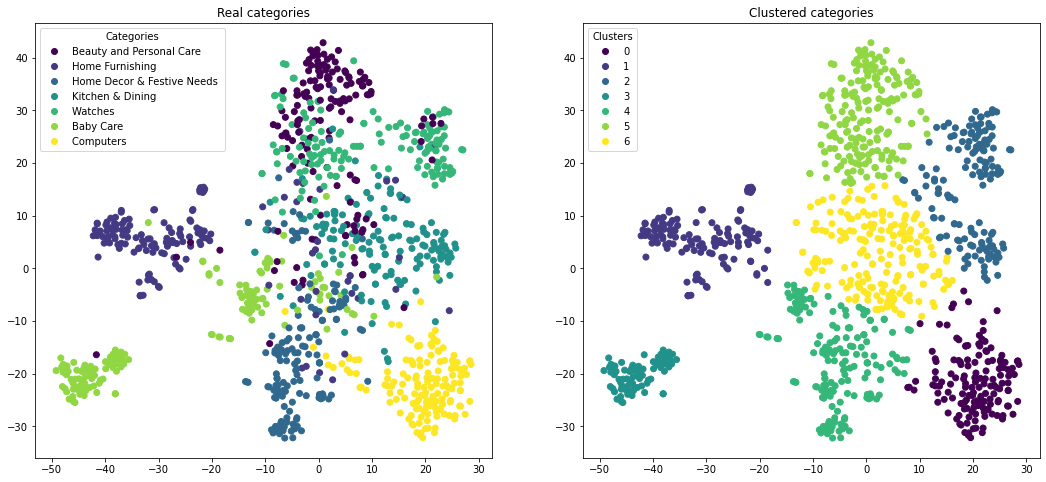

In [13]:
importlib.reload(utils)

list_cat = df['main_cat'].unique().tolist()
n_clust = len(list_cat)

ARI_cnn, X_cnn, df['cluster_cnn'] = utils.cluster_images(n_clust, df, df_cnn_features)

print('ARI (CNN): ', ARI_cnn)
utils.plot_cat(X_cnn, df['true_label'], df['cluster_cnn'], df['main_cat'])

In [14]:
df_cnn_features.to_csv(os.path.join(PATH, "df_features_cnn.csv"), index=True, header=True, index_label='image')

# IMAGE + TEXT

In [22]:
df_cnn = pd.read_csv(os.path.join(PATH, "df_features_cnn.csv"), index_col=0)
df_tfidf = pd.read_csv(os.path.join(PATH, "df_features_tfidf.csv"), index_col=0)

In [23]:
df_cnn

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
image,,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7.jpg,3.398614,0.859572,0.000000,1.106560,2.266122,2.927241,2.446448,0.000000,0.000000,0.000000,...,0.485876,0.0,0.000000,0.472938,0.875756,0.783684,0.000000,0.000000,0.851055,0.000000
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.000000,0.000000,0.000000,1.172009,0.000000,0.000000,0.000000,0.000000,0.000000,6.499799,...,1.169696,0.0,0.000000,0.000000,0.000000,3.152507,0.000000,0.000000,0.000000,0.000000
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.000000,0.000000,0.000000,4.457807,0.000000,0.000000,0.000000,0.000000,0.000000,2.820566,...,0.000000,0.0,0.000000,0.000000,0.000000,5.270284,0.000000,1.297100,0.000000,0.000000
d4684dcdc759dd9cdf41504698d737d8.jpg,0.000000,0.070991,0.000000,2.046283,0.000000,0.000000,0.000000,0.000000,0.000000,0.894024,...,0.000000,0.0,0.000000,0.000000,0.000000,3.977747,0.000000,0.000000,0.000000,0.000000
6325b6870c54cd47be6ebfbffa620ec7.jpg,3.417152,0.000000,0.000000,0.000000,1.012359,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,9.195916,0.139736,0.000000,1.735950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,2.312268,2.432937,0.000000,1.860516,3.101232,2.369040,0.000000,0.000000,1.428848,1.286600,...,0.000000,0.0,0.058723,0.000000,0.000000,0.000000,0.859425,1.085387,0.000000,0.000000
fd6cbcc22efb6b761bd564c28928483c.jpg,1.217184,0.365275,0.330849,0.000000,2.140628,0.000000,0.000000,0.767264,0.000000,3.563397,...,0.000000,0.0,0.837411,0.839075,0.000000,1.042110,0.000000,1.560315,0.000000,0.998342
5912e037d12774bb73a2048f35a00009.jpg,2.196130,2.398275,2.623641,0.983882,0.366652,0.535506,3.730995,0.000000,0.000000,0.000000,...,1.230694,0.0,0.000000,0.000000,0.000000,0.193308,0.546066,2.159872,0.184722,0.000000


In [24]:
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,4263,4264,4265,4266,4267,4268,4269,4270,4271,4272
image,,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d4684dcdc759dd9cdf41504698d737d8.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6325b6870c54cd47be6ebfbffa620ec7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fd6cbcc22efb6b761bd564c28928483c.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5912e037d12774bb73a2048f35a00009.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_all_features = pd.concat([df_tfidf, df_cnn], axis=1)
df_all_features

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
image,,,,,,,,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.485876,0.0,0.000000,0.472938,0.875756,0.783684,0.000000,0.000000,0.851055,0.000000
7b72c92c2f6c40268628ec5f14c6d590.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.169696,0.0,0.000000,0.000000,0.000000,3.152507,0.000000,0.000000,0.000000,0.000000
64d5d4a258243731dc7bbb1eef49ad74.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,5.270284,0.000000,1.297100,0.000000,0.000000
d4684dcdc759dd9cdf41504698d737d8.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,3.977747,0.000000,0.000000,0.000000,0.000000
6325b6870c54cd47be6ebfbffa620ec7.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,9.195916,0.139736,0.000000,1.735950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.058723,0.000000,0.000000,0.000000,0.859425,1.085387,0.000000,0.000000
fd6cbcc22efb6b761bd564c28928483c.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.837411,0.839075,0.000000,1.042110,0.000000,1.560315,0.000000,0.998342
5912e037d12774bb73a2048f35a00009.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.230694,0.0,0.000000,0.000000,0.000000,0.193308,0.546066,2.159872,0.184722,0.000000


In [19]:
"""from sklearn.preprocessing import StandardScaler

std_cont = StandardScaler()
df_all_features = std_cont.fit_transform(df_all_features) #Scaling"""

ARI (tfidf + CNN):  0.44687619975001097


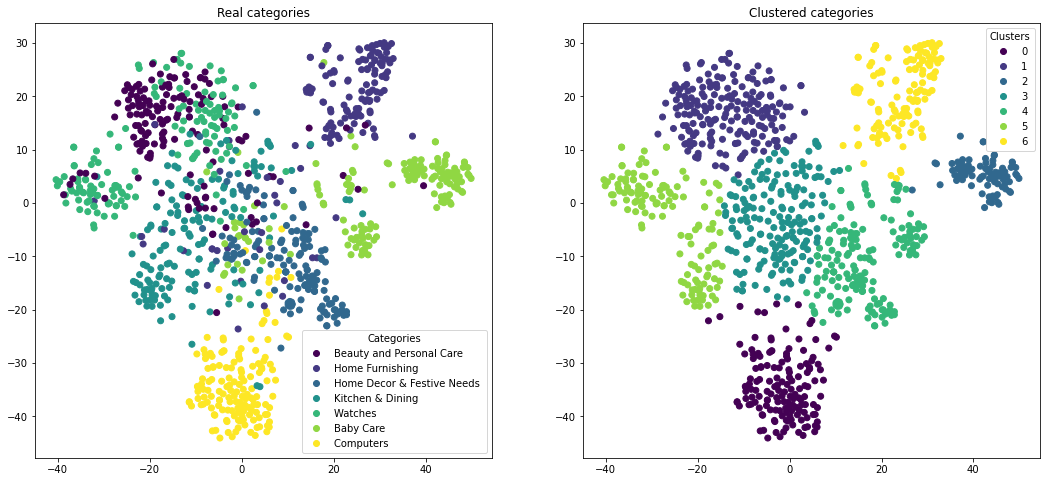

In [26]:
importlib.reload(utils)

list_cat = df['main_cat'].unique().tolist()
n_clust = len(list_cat)

ARI_tfidf_cnn, X_tfidf_cnn, df['cluster_tfidf_cnn'] = utils.cluster_images(n_clust, df, df_all_features, do_pca=False)

print('ARI (tfidf + CNN): ', ARI_tfidf_cnn)
utils.plot_cat(X_tfidf_cnn, df['true_label'], df['cluster_tfidf_cnn'], df['main_cat'])